In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_clean = pd.read_csv(filepath_or_buffer= "../data/Clean_Dataset2.csv") 
df_clean

,Category,Rating,Rating Count,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,1,0.0,Everyone,0,0,0
1,Lifestyle,0.0,0.0,1,0.0,Everyone,0,0,0
2,Shopping,4.3,918.0,1,0.0,Everyone,1,0,0
3,Finance,5.0,6.0,1,0.0,Everyone,0,0,0
4,Food & Drink,4.3,830.0,1,0.0,Everyone,1,0,0
...,...,...,...,...,...,...,...,...,...
5385,Video Players & Editors,2.5,6.0,1,0.0,Everyone,1,0,0
5386,Music & Audio,5.0,17.0,1,0.0,Everyone,1,0,0
5387,Education,4.3,142.0,1,0.0,Everyone,0,0,0
5388,Music & Audio,5.0,9.0,1,0.0,Teen,1,0,0


In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          5390 non-null   object 
 1   Rating            5390 non-null   float64
 2   Rating Count      5390 non-null   float64
 3   Free              5390 non-null   int64  
 4   Price             5390 non-null   float64
 5   Content Rating    5390 non-null   object 
 6   Ad Supported      5390 non-null   int64  
 7   In App Purchases  5390 non-null   int64  
 8   Editors Choice    5390 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 379.1+ KB


### Univariate Analysis

#### Categorical

In [4]:
categorical_df = df_clean.select_dtypes('object').copy()
categorical_df.head()

,Category,Content Rating
0,Entertainment,Everyone
1,Lifestyle,Everyone
2,Shopping,Everyone
3,Finance,Everyone
4,Food & Drink,Everyone


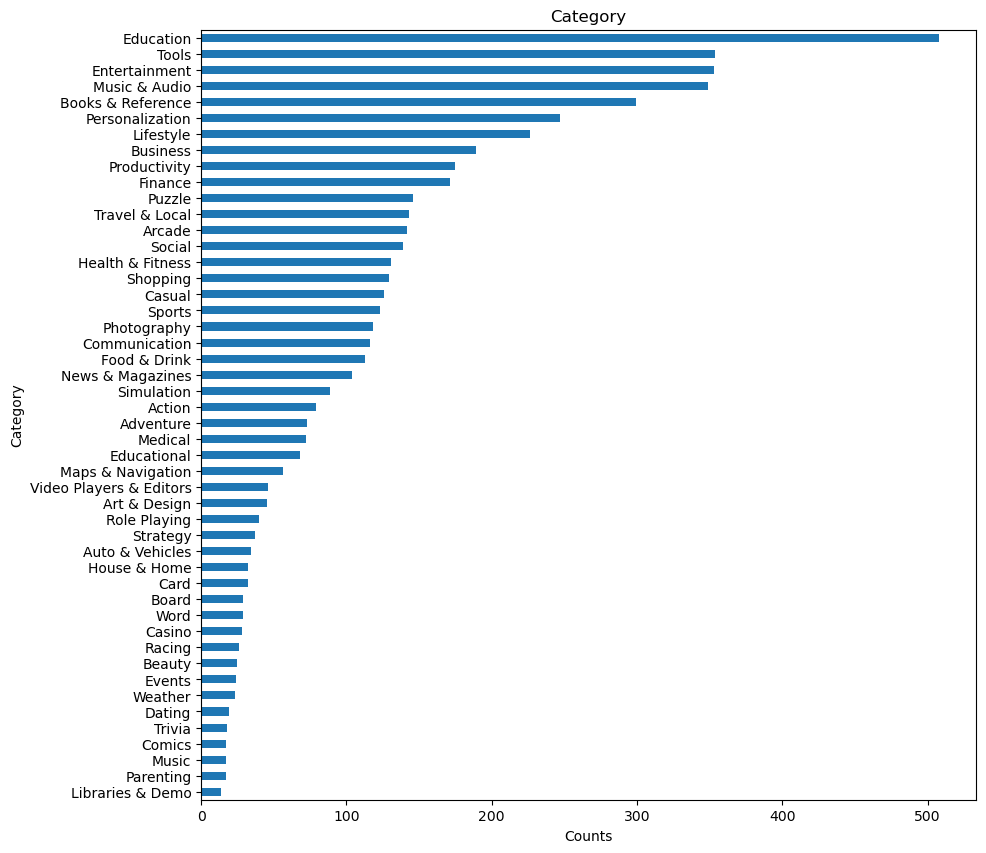

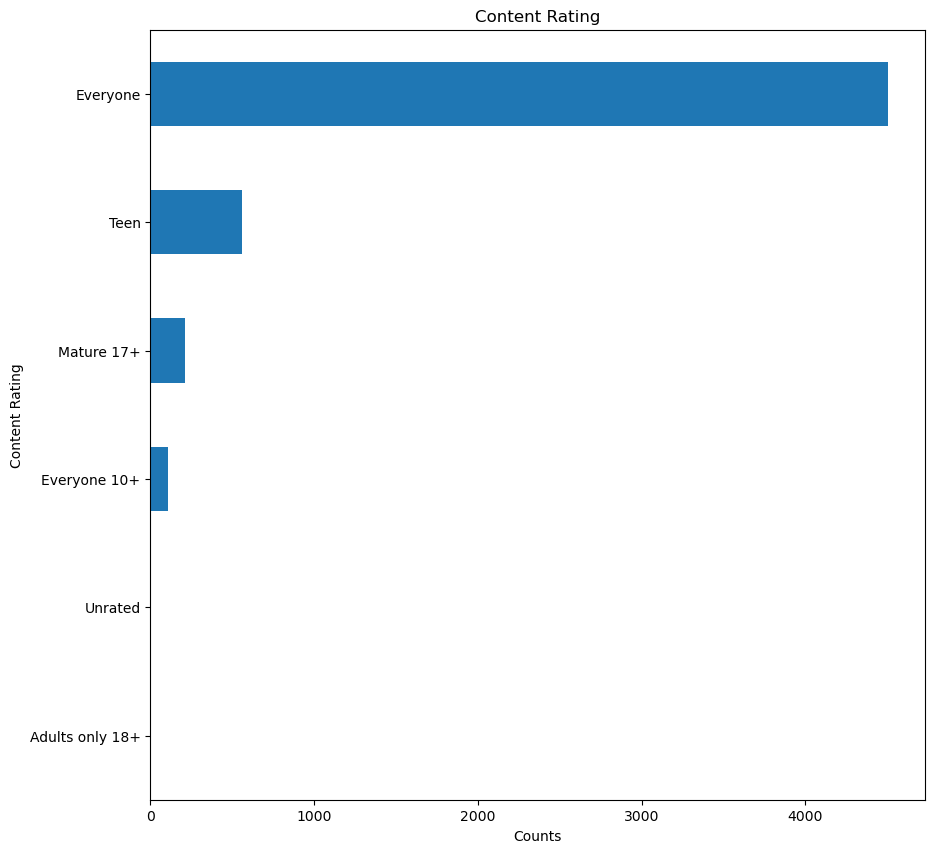

In [5]:
for column in categorical_df.columns:
    plt.figure(figsize=(10,10))
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel("Counts")
    plt.title(column)
    plt.show()

We can see that there is lots of education applications. 
Most of the applications is for everyone. 

#### Numerical 

In [6]:
df_clean.describe()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice
count,5390.000000,5.390000e+03,5390.000000,5390.000000,5390.000000,5390.000000,5390.000000
mean,3.845102,2.580250e+03,0.971985,0.193548,0.575510,0.140631,0.000186
std,1.164320,3.193481e+04,0.165030,4.129715,0.494311,0.347673,0.013621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.600000,1.000000e+01,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000,3.200000e+01,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.600000,1.590000e+02,1.000000,0.000000,1.000000,0.000000,0.000000
max,5.000000,1.569485e+06,1.000000,269.990000,1.000000,1.000000,1.000000


In [7]:
numeric_df = df_clean.select_dtypes(['int32','float64', 'int64']).copy()
numeric_df.head()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice
0,3.9,68.0,1,0.0,0,0,0
1,0.0,0.0,1,0.0,0,0,0
2,4.3,918.0,1,0.0,1,0,0
3,5.0,6.0,1,0.0,0,0,0
4,4.3,830.0,1,0.0,1,0,0


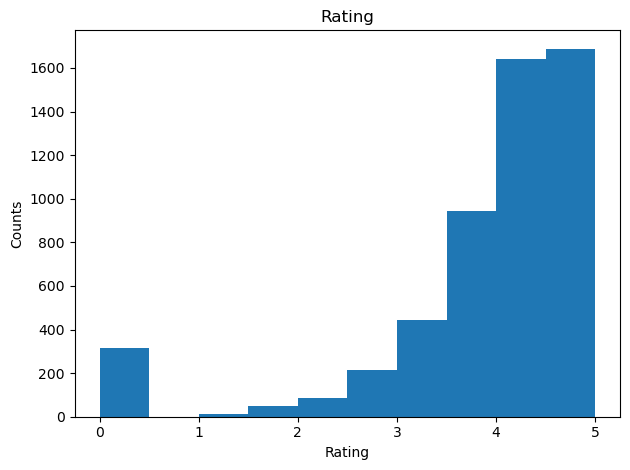

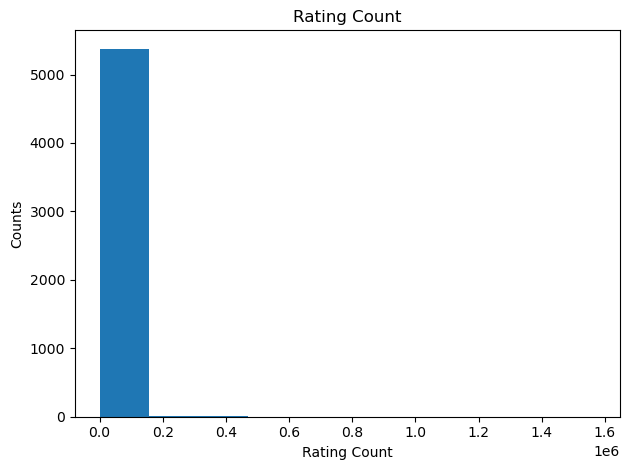

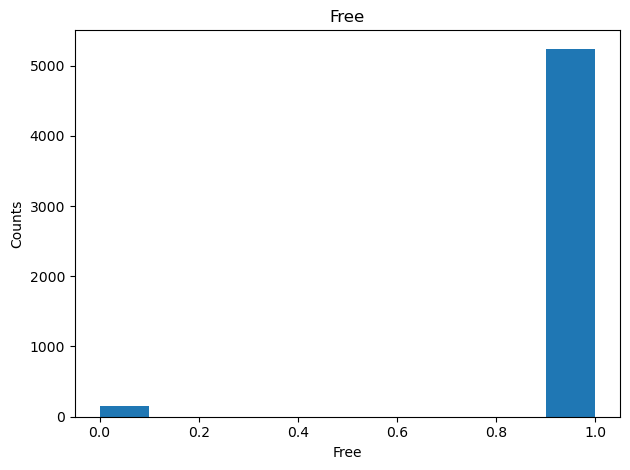

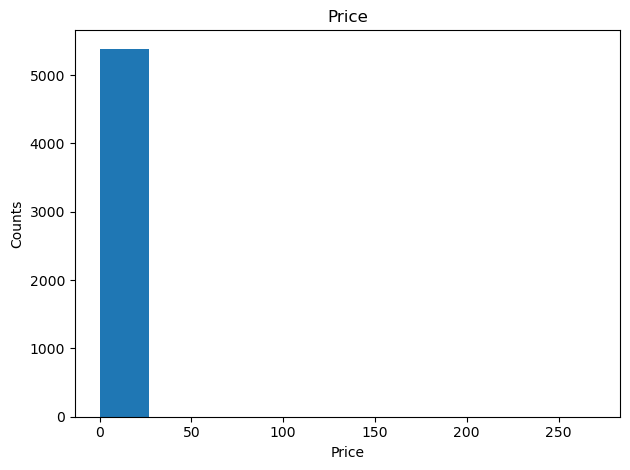

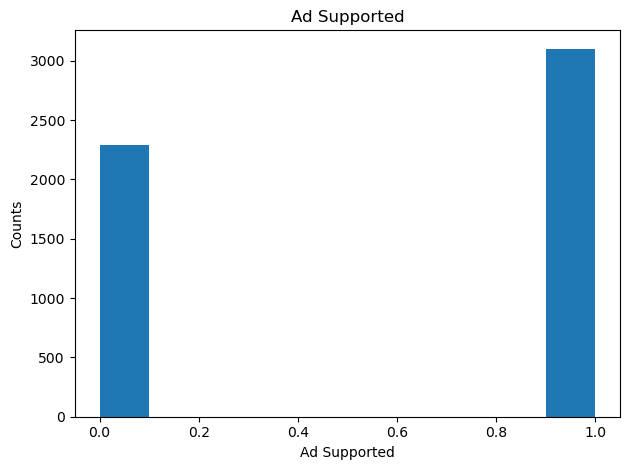

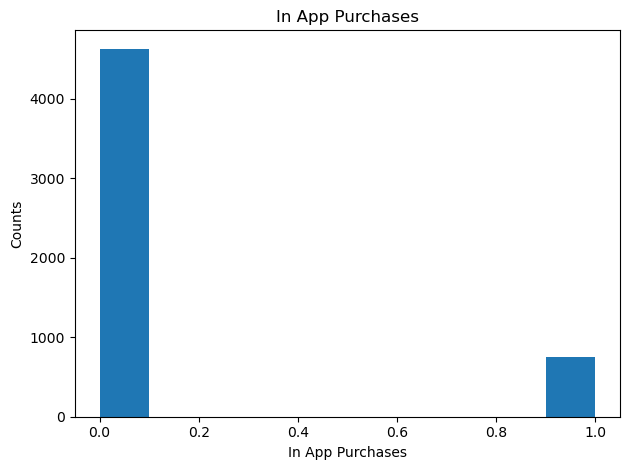

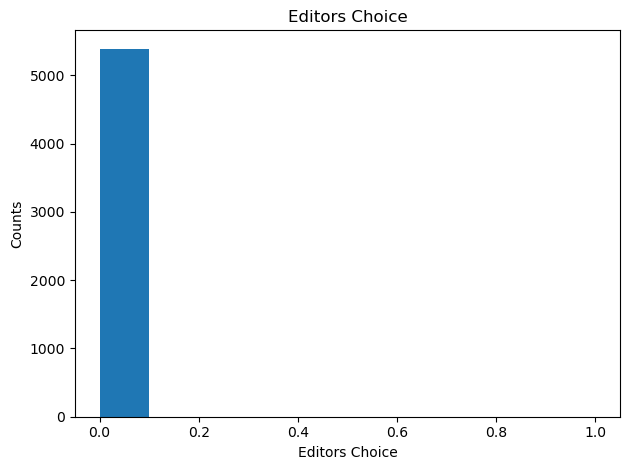

In [8]:
for column in numeric_df:
    plt.figure()
    plt.hist(df_clean[column], bins=10)
    plt.title(column)
    plt.ylabel('Counts')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

We can see that most of the application are rated 0
Most of the application are free
There is half of application ad supported and half non ad supported.
Most application does not have in app purchases 
None of the applications is editor choices. 

### Bivariate Analysis (target variable = Rating)

Our target variable is Rating, we need to analyse the relationship between this variable and our categorical and numerical values.

#### Categorical 

In [9]:
df_clean.groupby('Rating').value_counts()

Rating  Category         Rating Count  Free  Price  Content Rating  Ad Supported  In App Purchases  Editors Choice
0.0     Action           0.0           1     0.00   Everyone        0             0                 0                 1
                                                                                  1                 0                 1
        Personalization  0.0           1     0.00   Mature 17+      1             0                 0                 1
        Productivity     0.0           0     3.49   Everyone        0             0                 0                 1
                                             0.99   Everyone        0             0                 0                 1
                                                                                                                     ..
5.0     Education        5.0           1     0.00   Everyone        0             0                 0                 1
                                       0     

In [10]:
df_clean['Rating'].value_counts()

Rating
4.2    374
4.4    347
4.3    346
4.5    326
5.0    318
0.0    313
4.6    302
4.1    292
4.0    280
4.7    280
4.8    262
3.9    244
3.8    206
4.9    200
3.7    188
3.6    161
3.5    146
3.4    119
3.3     98
3.2     90
3.0     74
3.1     63
2.8     54
2.5     46
2.9     42
2.7     42
2.6     29
2.3     20
2.2     19
2.0     19
2.4     17
1.8     14
1.6     13
2.1     13
1.9     10
1.5      7
1.4      6
1.7      4
1.3      3
1.2      2
1.1      1
Name: count, dtype: int64

In [11]:
df_clean.groupby('Rating')['Category'].value_counts()

Rating  Category         
0.0     Education            20
        Entertainment        15
        Personalization      13
        Music & Audio        13
        Books & Reference    13
                             ..
5.0     Weather               1
        Trivia                1
        Strategy              1
        Racing                1
        Word                  1
Name: count, Length: 1097, dtype: int64

In [12]:
df_clean.groupby('Rating')['Content Rating'].value_counts()

Rating  Content Rating
0.0     Everyone          182
        Teen               65
        Mature 17+         41
        Everyone 10+       25
1.1     Everyone            1
                         ... 
4.9     Mature 17+          3
5.0     Everyone          274
        Teen               37
        Mature 17+          4
        Everyone 10+        3
Name: count, Length: 131, dtype: int64

#### Numerical

In [13]:
print(numeric_df)

      Rating  Rating Count  Free  Price  Ad Supported  In App Purchases  \
0        3.9          68.0     1    0.0             0                 0   
1        0.0           0.0     1    0.0             0                 0   
2        4.3         918.0     1    0.0             1                 0   
3        5.0           6.0     1    0.0             0                 0   
4        4.3         830.0     1    0.0             1                 0   
...      ...           ...   ...    ...           ...               ...   
5385     2.5           6.0     1    0.0             1                 0   
5386     5.0          17.0     1    0.0             1                 0   
5387     4.3         142.0     1    0.0             0                 0   
5388     5.0           9.0     1    0.0             1                 0   
5389     4.9          19.0     1    0.0             1                 0   

      Editors Choice  
0                  0  
1                  0  
2                  0  
3      

In [14]:
df_clean.groupby('Rating')['Free'].value_counts()

Rating  Free
0.0     1       262
        0        51
1.1     1         1
1.2     1         2
1.3     1         2
               ... 
4.8     0         8
4.9     1       195
        0         5
5.0     1       314
        0         4
Name: count, Length: 67, dtype: int64

In [15]:
df_clean.groupby('Rating')['Price'].value_counts()

Rating  Price
0.0     0.00     262
        0.99      14
        2.99       5
        1.49       3
        4.99       2
                ... 
5.0     0.00     314
        1.49       1
        1.99       1
        0.99       1
        14.99      1
Name: count, Length: 156, dtype: int64

In [16]:
df_clean.groupby('Rating')['Ad Supported'].value_counts()

Rating  Ad Supported
0.0     0               165
        1               148
1.1     0                 1
1.2     0                 2
1.3     0                 2
                       ... 
4.8     1               119
4.9     0               108
        1                92
5.0     0               170
        1               148
Name: count, Length: 79, dtype: int64

In [17]:
df_clean.groupby('Rating')['In App Purchases'].value_counts()

Rating  In App Purchases
0.0     0                   247
        1                    66
1.1     0                     1
1.2     0                     2
1.3     0                     3
                           ... 
4.8     1                    25
4.9     0                   181
        1                    19
5.0     0                   295
        1                    23
Name: count, Length: 77, dtype: int64

In [18]:
df_clean.groupby('Rating')['Editors Choice'].value_counts()

Rating  Editors Choice
0.0     0                 313
1.1     0                   1
1.2     0                   2
1.3     0                   3
1.4     0                   6
1.5     0                   7
1.6     0                  13
1.7     0                   4
1.8     0                  14
1.9     0                  10
2.0     0                  19
2.1     0                  13
2.2     0                  19
2.3     0                  20
2.4     0                  17
2.5     0                  46
2.6     0                  29
2.7     0                  42
2.8     0                  54
2.9     0                  42
3.0     0                  74
3.1     0                  63
3.2     0                  90
3.3     0                  98
3.4     0                 119
3.5     0                 146
3.6     0                 161
3.7     0                 188
3.8     0                 206
3.9     0                 244
4.0     0                 280
4.1     0                 292
4.2     0        

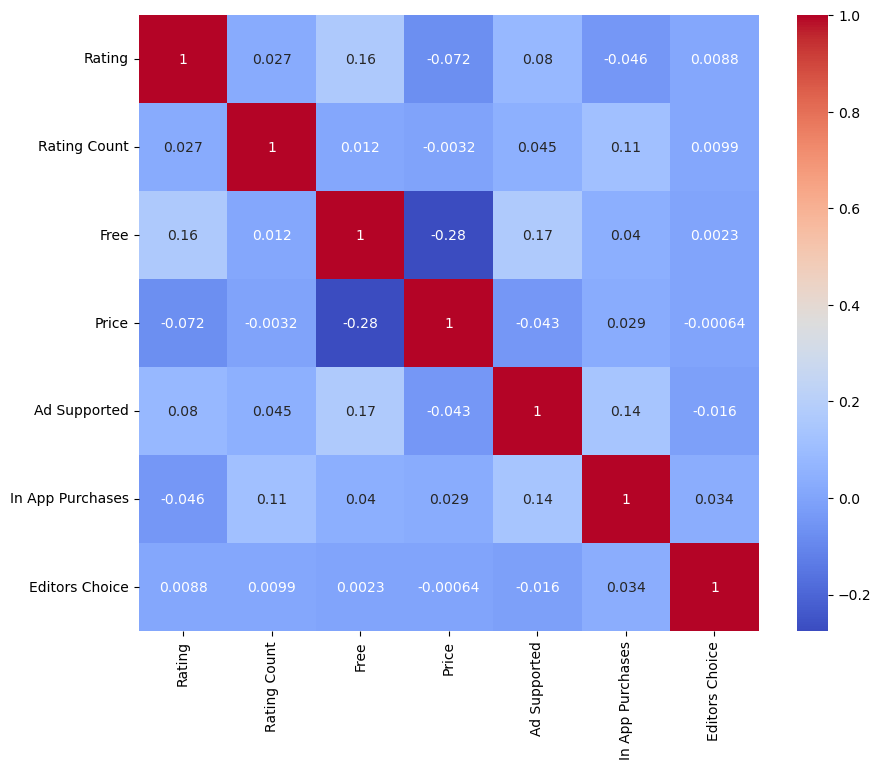

In [20]:
columns = ['Rating', 'Rating Count', 'Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice']
correlation_matrix = df_clean[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

We can see that our target variable Rating correlation is not really strong with the other columns.